# Project Title: Predicting Outcomes with Data

### Author: Su Zheng
### Date: 6/12/25

---

## 1. Introduction & Objectives

- **Dataset Chosen**: Medical Insurance Costs Dataset
- **Project Objective**: 

    In this final project, I will be building a regression model to predict medical insurance charges datasets containing information about individuals' demographics and habits. The primary objective is to explore how accurately medical insurance costs can be predicted. Columns included are age, sex, bmi, children, smoker, region, and charges (the predictive label).
    
    
- **Research Questions**: 

    * Which demographic and lifestyle variables are most strongly associated with predicting insurance charges?
    * To what extent does BMI (body mass index) predict higher insurance costs?
    * Is this a significant difference in medical insurance charges between smokers and non-smokers?
    

- **Hypotheses:**
    * H1: Individuals who smoke will have significantly higher medical insurance charges than non-smokers.

---

## 2. Data Exploration & Preparation

### 2.1 Load and Explore the Data
- Load the dataset and display the first few rows.
- Provide a summary of the dataset, including the number of rows, columns, and types of variables.

In [2]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load the dataset
insurance <-read.csv("insurance.csv", sep = ",")

# Display dataset summary
summary(insurance)

# View dataset structure
str(insurance)

# View number of columns
insurance_col <- ncol(insurance)
cat("Total number of columns is", insurance_col, "\n")

# View number of rows 
insurance_rows <- nrow(insurance)
cat("Total number of rows is", insurance_rows)

# Print column names
names(insurance)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...
Total number of columns is 7 
Total number of rows is 1338

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

### 2.2 Descriptive Statistics & Visualizations
- Calculate and display basic statistics (mean, median, standard deviation) for relevant variables.
- Create visualizations to explore relationships and distributions of key variables.

mean_BMI,median_BMI,sd_BMI
<dbl>,<dbl>,<dbl>
30.6634,30.4,6.098187


mean_charges,median_charges,sd_charges
<dbl>,<dbl>,<dbl>
13270.42,9382.033,12110.01


no  yes 
1064  274

smoker,count,mean_charge,median_charge,sd_charge
<fct>,<int>,<dbl>,<dbl>,<dbl>
no,1064,8434.268,7345.405,5993.782
yes,274,32050.232,34456.348,11541.547


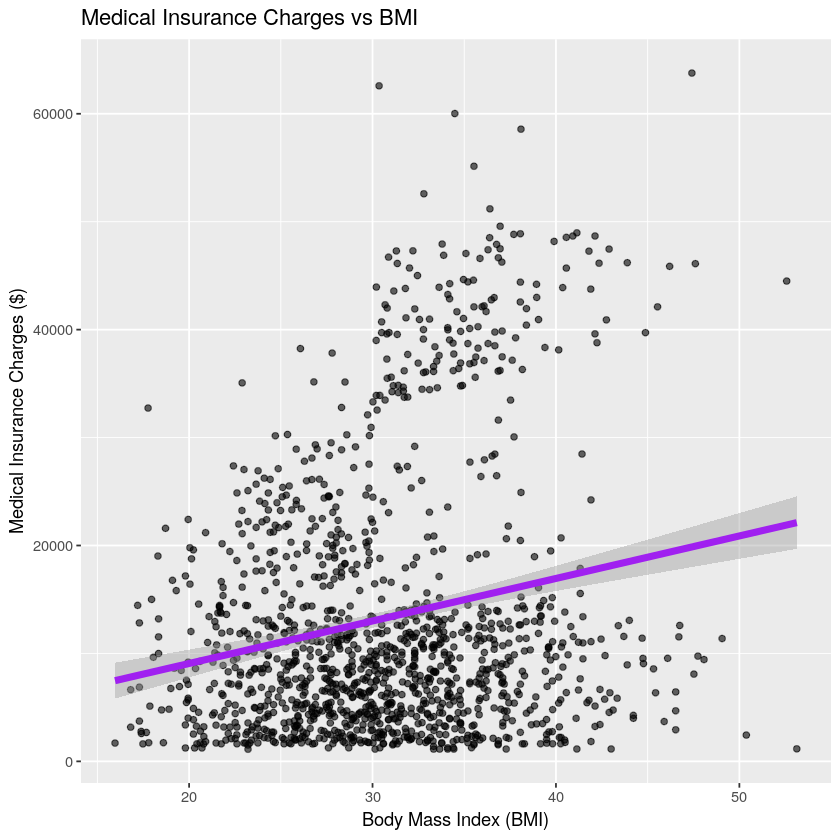

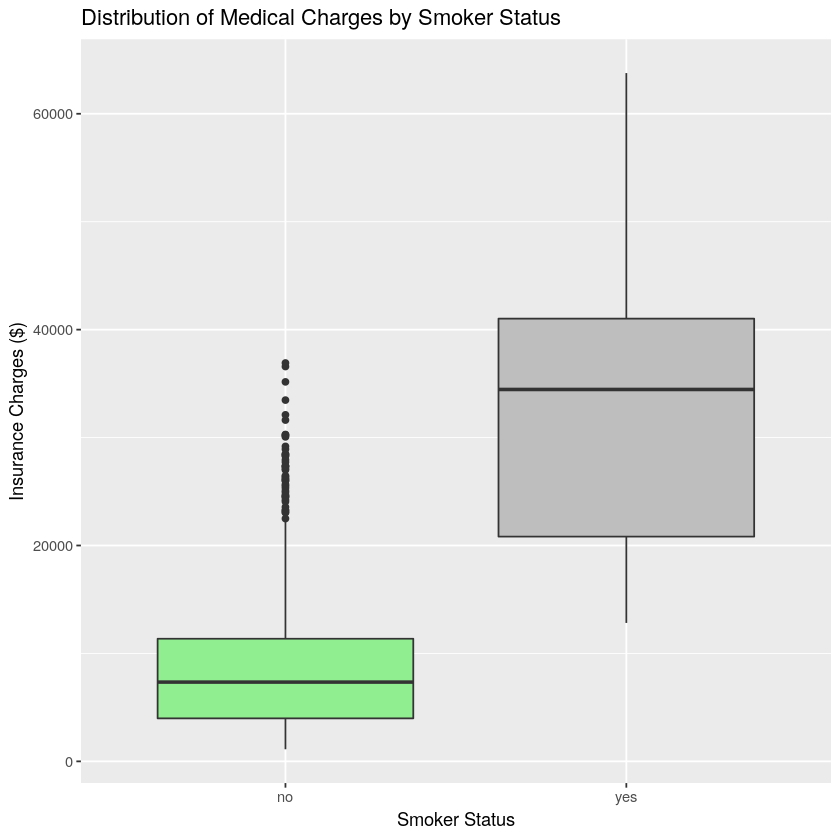

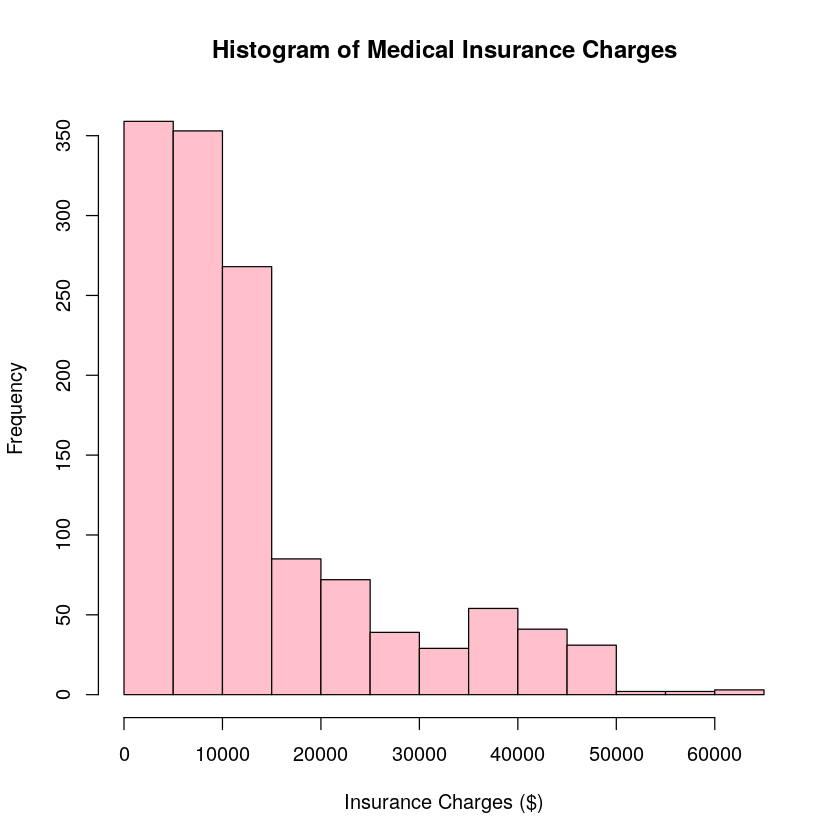

In [4]:
# Basic statistics

# Calculate mean, median, and standard deviation for BMI
insurance %>%
  summarise(
    mean_BMI = mean(bmi),
    median_BMI = median(bmi),
    sd_BMI = sd(bmi)
  )

# Calculate mean, median, and standard deviation for charges
insurance %>%
  summarise(
    mean_charges = mean(charges),
    median_charges = median(charges),
    sd_charges = sd(charges)
  )

# View summary of the smoker variable
summary(insurance$smoker)

# Calculate basic statistics for charges based on smokers vs non-smokers
insurance %>%
  group_by(smoker) %>%
  summarise(
    count = n(),
    mean_charge = mean(charges),
    median_charge = median(charges),
    sd_charge = sd(charges)
  )

# All Visualizations:

# 1 - Creates a scatterplot to visualize the relationship between BMI and medical insurance charges
ggplot(insurance, aes(x=bmi, y=charges)) +
    geom_jitter(alpha = 0.6) +
    geom_smooth(method = "lm", col = "purple", size = 2) +
     labs(
        x = "Body Mass Index (BMI)",
        y = "Medical Insurance Charges ($)",
        title = "Medical Insurance Charges vs BMI"
    )

# 2 - Creates two boxplots to visually compare the relationship between smoker status and medical insurance charges

ggplot(insurance, aes(x=smoker, y=charges)) +
    geom_boxplot(fill = c("lightgreen", "gray")) +
    labs(
        title = "Distribution of Medical Charges by Smoker Status",
        x = "Smoker Status",
        y = "Insurance Charges ($)"
)

# 3 - Creates a histogram to show the distribution of medical insurance charges
hist(insurance$charges, main="Histogram of Medical Insurance Charges", xlab="Insurance Charges ($)", col="pink", border="black")



### 2.3 Data Cleaning & Preparation
- Handle missing values and outliers.
- Encode categorical variables and scale numerical features if necessary.
- Split the dataset into training and testing sets.

[1] 0


0%       25%       50%       75%      100% 
 1121.874  4740.287  9382.033 16639.913 63770.428

0%      25%      50%      75%     100% 
15.96000 26.29625 30.40000 34.69375 53.13000

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


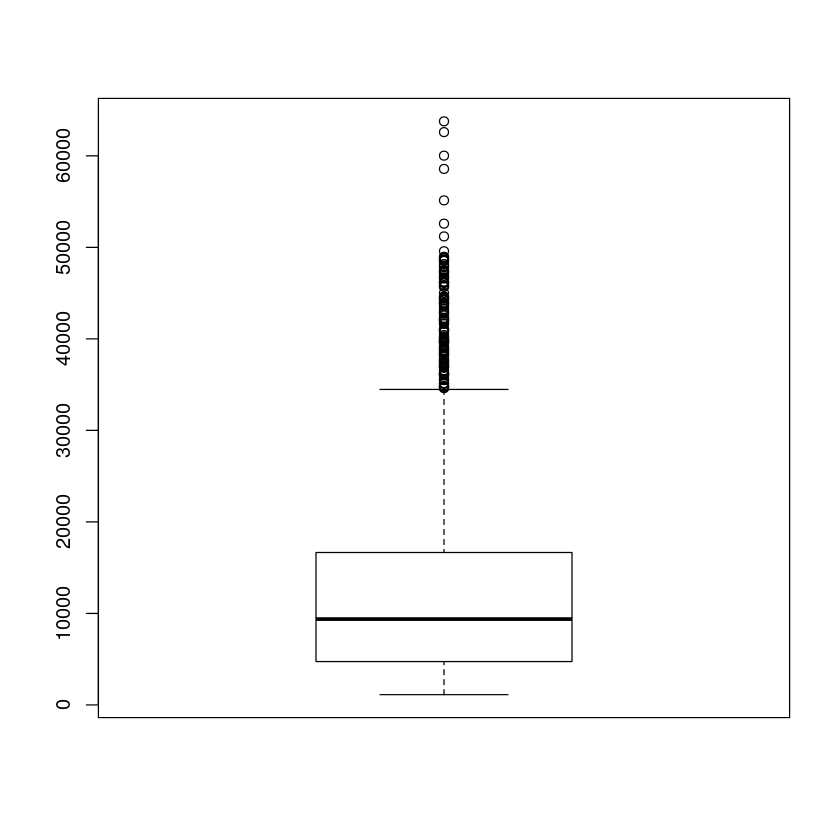

In [12]:
# Data cleaning steps

# Check for number of missing values
total_missing <- sum(is.na(insurance$charges))
print(total_missing)

# View distributions to see outliers for charges
quantile(insurance$charges) # Observation: Large variance in charges 

# View distributions to see outliers for BMI
quantile(insurance$bmi) # Observation: Realistic values and extremes in BMI

# View boxplot to examine outliers for charges
boxplot(insurance$charges) # Very right-skewed which is normal for insurance costs

# View data structure
str(insurance)

# Convert categorical variables (sex, smoker, region) to factor
insurance$sex <- as.factor(insurance$sex)
insurance$smoker <- as.factor(insurance$smoker)
insurance$region <- as.factor(insurance$region)

# Set reference groups for the model
insurance$sex <- relevel(insurance$sex, ref = "female")
insurance$smoker <- relevel(insurance$smoker, ref = "no")
insurance$region <- relevel(insurance$region, ref = "northeast")

**Explanation on Outliers:**

There are outliers in this dataset for both the charges and BMI variables (most relevant to my research questions). However, no outliers will not be specifically removed, because medical insurance charges can naturally have high variance and is especially dependent on what health conditions the individual has. BMI extremes are realistic.


In [13]:
# Splitting data 
library(caret)

# Split the dataset into training and testing sets

set.seed(126) # for reproducibility

# 80% training, 20% testing for a small dataset
trainIndex <- createDataPartition(insurance$charges, p = 0.8, list = FALSE)
trainData <- insurance[trainIndex, ]
testData <- insurance[-trainIndex, ]

## 3. Model Building & Explanation

### 3.1 Model Selection and Explanation
- Choose and describe the type of model you will build (e.g., linear regression, logistic regression).
- Explain why this model is suitable for your analysis.

**Model Selection:** Linear Regression Model

**Explanation:** 
A linear regression model is most appropriate for the analysis of this medical insurance costs dataset, because the target variable, charges, is continuous and numerical. Many features in this dataset, such as age, bmi, and smoker status, have logical and potential linear relationship with insurance costs. Thus, it is appropriate to use a linear regression model to predict charges.

In [15]:
# Linear Regression - Model 1

# Fit a simple linear regression model
simple_model <- lm(charges ~ bmi, data = insurance)

# Show summary of model
summary(simple_model)

# Linear Regression - Model 2

# Fit a multiple linear regression model
multiple_model <- lm(charges ~ ., data = insurance)

# Remove insignificant variables
multiple_model <- lm(charges ~ .  - sex, data = insurance)

# Show summary of the simplified multiple linear regression model
summary(multiple_model)


Call:
lm(formula = charges ~ bmi, data = insurance)

Residuals:
   Min     1Q Median     3Q    Max 
-20956  -8118  -3757   4722  49442 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1192.94    1664.80   0.717    0.474    
bmi           393.87      53.25   7.397 2.46e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11870 on 1336 degrees of freedom
Multiple R-squared:  0.03934,	Adjusted R-squared:  0.03862 
F-statistic: 54.71 on 1 and 1336 DF,  p-value: 2.459e-13



Call:
lm(formula = charges ~ . - sex, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11367.2  -2835.4   -979.7   1361.9  29935.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11990.27     978.76 -12.250  < 2e-16 ***
age                256.97      11.89  21.610  < 2e-16 ***
bmi                338.66      28.56  11.858  < 2e-16 ***
children           474.57     137.74   3.445 0.000588 ***
smokeryes        23836.30     411.86  57.875  < 2e-16 ***
regionnorthwest   -352.18     476.12  -0.740 0.459618    
regionsoutheast  -1034.36     478.54  -2.162 0.030834 *  
regionsouthwest   -959.37     477.78  -2.008 0.044846 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6060 on 1330 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7496 
F-statistic: 572.7 on 7 and 1330 DF,  p-value: < 2.2e-16


### 3.2 Model Training
- Train the model using the training dataset.
- Display a summary of the model.

In [16]:
# Simple Linear Regression - Model 1

# Training model 1 using the training dataset
simple_tmodel <- lm(charges ~ bmi, data = trainData)

# Show summary of the model
summary(simple_tmodel)

# Predict charges on the test set using the trained model
simp_predictions <- predict(simple_tmodel, newdata = testData)

# Display the first few predictions
head(simp_predictions)


Call:
lm(formula = charges ~ bmi, data = trainData)

Residuals:
   Min     1Q Median     3Q    Max 
-20102  -8040  -3786   4422  49463 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2281.72    1861.28   1.226    0.221    
bmi           357.32      59.64   5.991 2.84e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11820 on 1070 degrees of freedom
Multiple R-squared:  0.03246,	Adjusted R-squared:  0.03155 
F-statistic: 35.89 on 1 and 1070 DF,  p-value: 2.844e-09


3        9       13       14       21       35 
14073.14 12940.45 14573.38 16510.03 15146.87 15288.01

In [17]:
# Multiple Linear Regression - Model 2

# Training model 2 using the training dataset
multiple_tmodel <- lm(charges ~ . - sex, data = trainData)

# Show summary of the model
summary(multiple_tmodel)

# Predict charges using on the test set using the trained model
mult_predictions <- predict(multiple_tmodel, newdata = testData)

# Display the first few predictions
head(mult_predictions)



Call:
lm(formula = charges ~ . - sex, data = trainData)

Residuals:
     Min       1Q   Median       3Q      Max 
-11762.9  -2780.3   -989.2   1234.1  29629.0 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11663.99    1109.57 -10.512   <2e-16 ***
age                258.15      13.36  19.329   <2e-16 ***
bmi                323.24      32.40   9.975   <2e-16 ***
children           437.20     155.78   2.807   0.0051 ** 
smokeryes        24028.57     467.66  51.381   <2e-16 ***
regionnorthwest    -26.38     537.07  -0.049   0.9608    
regionsoutheast   -830.92     542.60  -1.531   0.1260    
regionsouthwest   -829.16     537.76  -1.542   0.1234    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6085 on 1064 degrees of freedom
Multiple R-squared:  0.7451,	Adjusted R-squared:  0.7434 
F-statistic: 444.2 on 7 and 1064 DF,  p-value: < 2.2e-16


3         9        13        14        21        35 
 6711.777  8404.151  4563.750 14832.811 15463.156 30966.740

## 4. Model Evaluation & Analysis

### 4.1 Evaluate Model Performance
- Use relevant metrics to assess model performance (e.g., Mean Squared Error for regression, accuracy, precision, recall for classification).
- Display and interpret these metrics.

Mean Squared Error: 146205950 
Root Mean Squared Error: 12091.57

RMSE     Rsquared          MAE 
1.209157e+04 7.076658e-02 9.334862e+03

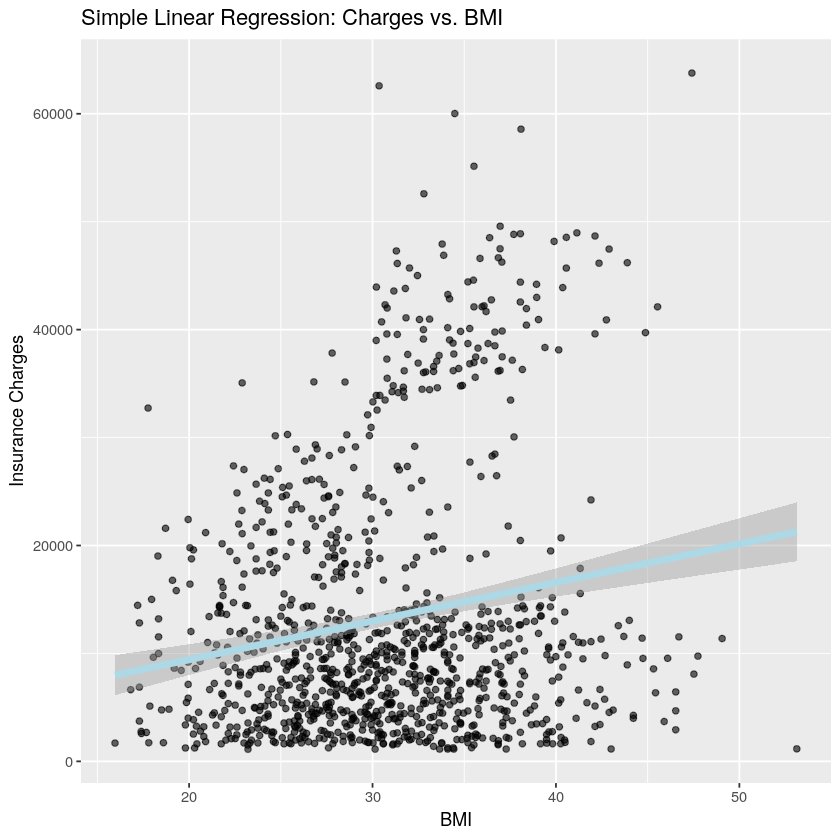

In [18]:
# For regression: calculate Mean Squared Error

# Model 1 - Simple Linear Regression

# Calculate the mean squared error
simp_mse <- mean((testData$charges - simp_predictions)^2)
cat("Mean Squared Error:", simp_mse, "\n")

# Calculate the Root Mean Squared Error (RMSE) to get the error in dollars
simp_rmse <- sqrt(simp_mse)
cat("Root Mean Squared Error:", simp_rmse) # Average Error

# Scatterplot with the simple regression line using the training data
ggplot(trainData, aes(x = bmi, y = charges)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "lightblue", size = 2) +
  labs(title = "Simple Linear Regression: Charges vs. BMI",
       x = "BMI", y = "Insurance Charges")

# Show metrics to confirm
postResample(pred = simp_predictions, obs = testData$charges)


In [5]:
# Model 2 - Multivariate / Mulitiple Linear Regression

# Calculate the Mean Squared Error for the multiple regression model
mult_mse <- mean((testData$charges - mult_predictions)^2)
cat("Mean Squared Error:",mult_mse, "\n")

# Calculate the Root Mean Squared Error (RMSE) to get the error in dollars
mult_rmse <- sqrt(mult_mse)
cat("Root Mean Squared Error:", mult_rmse) # Average Error

# Show metrics to confirm
postResample(pred = mult_predictions, obs = testData$charges)

ERROR: Error in mean((testData$charges - mult_predictions)^2): object 'testData' not found


###  Model 1 Interpretation

In the first model (simple linear regression), the mean squared error (MSE) is 146,205,950, which results in a root mean squared error (RMSE) of approximately 12,091.57. This means that, on average, the model's predictions deviate from the actual insurance charges by about $12,092. 

The R-squared value of around 0.07 suggests that only 7% of the variance in insurance charges is explained by BMI alone. This indicates that BMI by itself is not a strong predictor of insurance charges, and the model is not sufficient for accurate prediction. However, the BMI variable could still contribute to the full model as seen in the second model. 

### Model 2 Interpretation

In the second model (multiple linear regression), the MSE is 35,667,019 and the RMSE is about 5,972.19. This means the second model's prediction of insurance charges is off by around $5,972.19. Compared to Model 1, this model performs significantly better by cutting the average error by over 50%.

The R-squared value of 0.77 indicates that approximately 77% of the variance in insurance charges can be explained by the included variables — such as age, BMI, children, smoking status, and region. This suggests that the multiple regression model captures strong relationships between several predictors and insurance charges, making it a much more reliable and informative model.



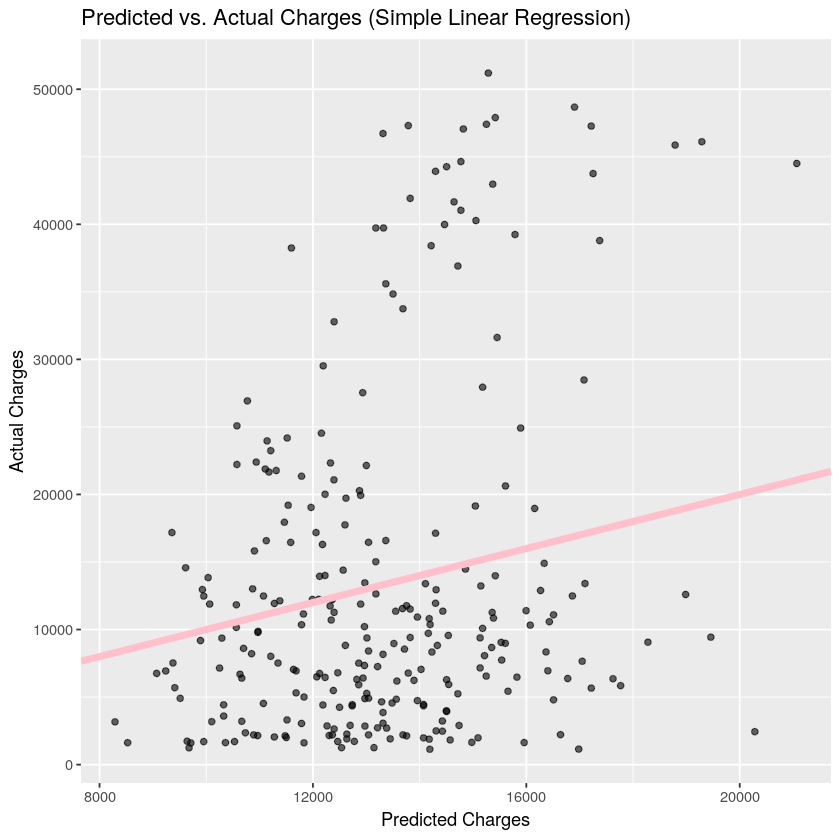

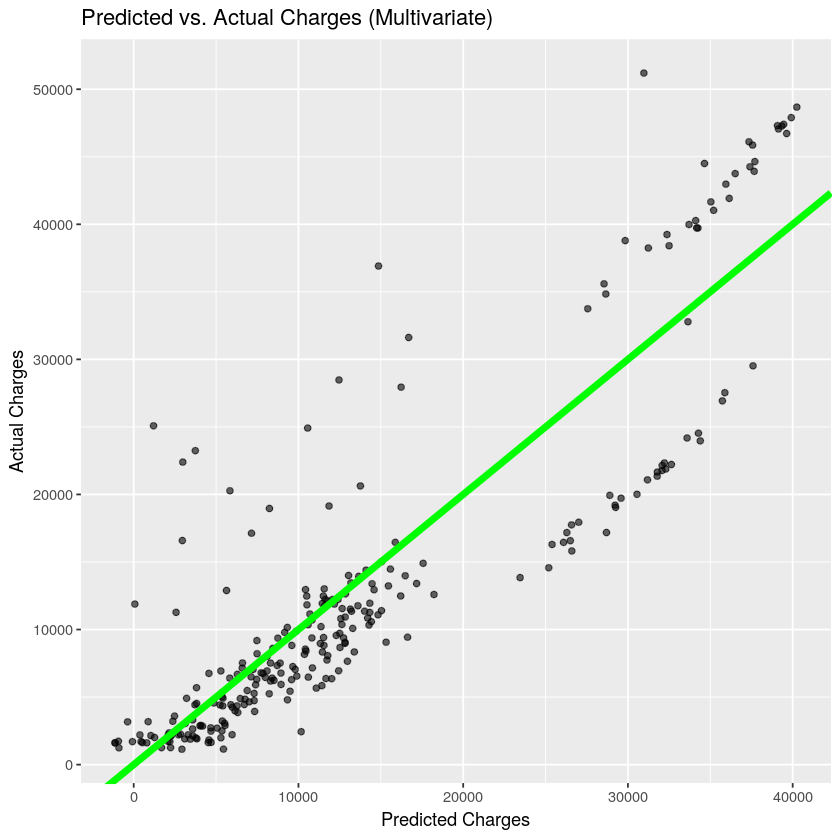

In [24]:
# Visualizations for Model Performance Evaluation

# Model 1 - Creates a scatterplot (residual plot) by comparing prediciton vs actual charges values
ggplot(data = testData, aes(x = simp_predictions, y = charges)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "pink", size = 2) +
  labs(title = "Predicted vs. Actual Charges (Simple Linear Regression)",
       x = "Predicted Charges", y = "Actual Charges")

# Model 2 - Create a scatterplot (residual plot) by comparing prediciton vs actual charges values
ggplot(data = testData, aes(x = mult_predictions, y = charges)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "green", size = 2) +
  labs(title = "Predicted vs. Actual Charges (Multivariate)",
       x = "Predicted Charges", y = "Actual Charges")


**Graph Interpretation:** 
In the two graphs above, the predicted charges are plotted as against actual charges. The diagonal line acts as a reference line illustrating where the perfect predictions are, so the closer the data points are to the line, the more accurate they are. As seen from the resulting graphs, the second graph (multiple) has much more data points tightly clustered around the line which indicates a better fit compared to the much more scattered first graph (simple).

### 4.2 Experimentation & Impact Analysis
- Experiment with different model parameters (e.g., adding/removing features, adjusting thresholds).
- Record observations on how changes impact model performance.

In [31]:
# Show model 2 fitted again
second_model <- lm(charges ~ . - sex, data = insurance)
summary(second_model)

# Remove variables with less significant impact (region)
alternative_model <- lm(charges ~ .  - sex - region, data = insurance)
summary(alternative_model)

# Training alternative model using the training dataset
alternative_model <- lm(charges ~ . - sex - region, data = trainData)

# Show summary of the model
summary(alternative_model)

# Predict charges using on the test set using the trained model
alternative_pred <- predict(alternative_model, newdata = testData)

# Display the first few predictions
head(alternative_pred)

# Display metrics of alternative model
postResample(pred = alternative_pred, obs = testData$charges)


Call:
lm(formula = charges ~ . - sex, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11367.2  -2835.4   -979.7   1361.9  29935.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11990.27     978.76 -12.250  < 2e-16 ***
age                256.97      11.89  21.610  < 2e-16 ***
bmi                338.66      28.56  11.858  < 2e-16 ***
children           474.57     137.74   3.445 0.000588 ***
smokeryes        23836.30     411.86  57.875  < 2e-16 ***
regionnorthwest   -352.18     476.12  -0.740 0.459618    
regionsoutheast  -1034.36     478.54  -2.162 0.030834 *  
regionsouthwest   -959.37     477.78  -2.008 0.044846 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6060 on 1330 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7496 
F-statistic: 572.7 on 7 and 1330 DF,  p-value: < 2.2e-16



Call:
lm(formula = charges ~ . - sex - region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11897.9  -2920.8   -986.6   1392.2  29509.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12102.77     941.98 -12.848  < 2e-16 ***
age            257.85      11.90  21.675  < 2e-16 ***
bmi            321.85      27.38  11.756  < 2e-16 ***
children       473.50     137.79   3.436 0.000608 ***
smokeryes    23811.40     411.22  57.904  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6068 on 1333 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7489 
F-statistic: 998.1 on 4 and 1333 DF,  p-value: < 2.2e-16



Call:
lm(formula = charges ~ . - sex - region, data = trainData)

Residuals:
     Min       1Q   Median       3Q      Max 
-12336.7  -2831.0   -963.5   1229.8  29235.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11611.53    1071.20 -10.840  < 2e-16 ***
age            259.04      13.35  19.399  < 2e-16 ***
bmi            306.26      30.85   9.926  < 2e-16 ***
children       436.34     155.58   2.805  0.00513 ** 
smokeryes    24014.71     465.77  51.560  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6090 on 1067 degrees of freedom
Multiple R-squared:  0.744,	Adjusted R-squared:  0.743 
F-statistic: 775.2 on 4 and 1067 DF,  p-value: < 2.2e-16


3         9        13        14        21        35 
 7057.051  7981.236  4881.583 15089.803 14957.596 31240.345

RMSE     Rsquared          MAE 
5987.9323399    0.7712299 4204.8035015

**Experimentation Model Impact Analysis:**

In the third model above, the region variable has been removed and trained using the training data. The resulting metrics show that there is not a large difference in the performance of the model. The alternative model has a RMSE of 5,988 compared to the second model at 5,972. Therefore, including region as a predictor only slightly increases the model accuracy by improving the adjusted R-squared by 0.07%. While some regions contribute more, others like regionnorthwest are not statistically significant and have much minimal contribution to the model predictions. 
Overall, based on these metrics, the region variable could be potentially excluded in order to simplify the model. 

### 4.3 Statistical Analysis
-  Create a hypothesis and perform a t.test to reject or fail to reject that hypothesis


- **Hypotheses:**
    * Null Hypothesis (H0): Null hypothesis (H₀): There is no significant difference in average insurance charges between smokers and non-smokers.
    * Altenative Hypothesis (H1): Smokers have significantly higher average insurance charges than non-smokers.
    

In [35]:
# Perform a two-sample t-test to compare smokers vs non-smokers
t_test_result <- t.test(charges ~ smoker, data = insurance)
t_test_result

# Print results of the t-test
if (t_test_result$p.value < 0.05) {
  cat('The result is statistically significant. Reject the null hypothesis.')
} else {
  cat('The result is not statistically significant. Do not reject the null hypothesis.')
}


	Welch Two Sample t-test

data:  charges by smoker
t = -32.752, df = 311.85, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -25034.71 -22197.21
sample estimates:
 mean in group no mean in group yes 
         8434.268         32050.232 


The result is statistically significant. Reject the null hypothesis.

**Interpretation:**

There is strong statistical evidence that smokers have significantly higher medical insurance charges compared to non-smokers. On average, smokers pay approximately $23,616 more. The p-value is very close to zero, so the difference between the two groups is statistically significant. The negative and fairly large t-value and confidence interval also reflects the fact that smokers have much higher and signficant insurances chargers compared to non-smokers.

## 5. Conclusion & Summary of Findings

- Summarize your main findings and insights.
- Discuss any challenges encountered and what you would explore next if you had more time.

In this analysis of medical insurance costs, I explored the factors most strongly associated with medical insurance charges by utilizing linear regression and hypothesis testing. The multiple linear regression model revealed that smoking status, age, BMI, and number of children were statistically significant predictors of charges, with smoking having the largest practical impact. A simple linear regression using only BMI showed poor predictive performance (R² ≈ 0.07), whereas the multivariate model achieved a much higher R² of approximately 0.75, indicating that the combination of demographic and lifestyle features explained a large proportion of the variance in insurance charges. Lastly, a two-sample t-test provided strong statistical evidence that smokers incur significantly higher insurance charges than non-smokers with a mean difference of over $23,000.

One challenge I encountered was handling the large range and skewed distribution of insurance charges, which affected model accuracy. Although I tried log transformation and different train-test splits, the Root Mean Squared Error (RMSE) still remained relatively high, suggesting potential improvements could be made with more advanced modeling techniques or data preprocessing. If I had more time, I would expand the dataset to include additional demographic and behavioral attributes such as exercise frequency, diet, or occupation, which could provide a more complete picture of factors driving medical costs. I would also explore interaction effects between the various variables and research other nonlinear models to improve predictive performance. 